### Toyota
#### Practise comparing model predicting performance following Tolgahan Cepel in Kaggle.com

### Import libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

### Read the file

In [3]:
toyota = pd.read_csv('ToyotaCorolla.csv')

In [4]:
toyota.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23,46986,Diesel,90,1,0,2000,3,1165
1,13750,23,72937,Diesel,90,1,0,2000,3,1165
2,13950,24,41711,Diesel,90,1,0,2000,3,1165
3,14950,26,48000,Diesel,90,0,0,2000,3,1165
4,13750,30,38500,Diesel,90,0,0,2000,3,1170


In [5]:
toyota.shape

(1436, 10)

### Check null

In [6]:
toyota.isnull().sum()

Price        0
Age          0
KM           0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64

### Check types

In [7]:
toyota.dtypes

Price         int64
Age           int64
KM            int64
FuelType     object
HP            int64
MetColor      int64
Automatic     int64
CC            int64
Doors         int64
Weight        int64
dtype: object

### Plot heatmap

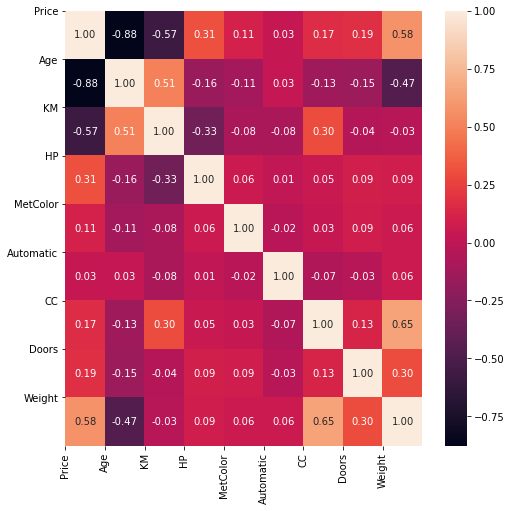

In [8]:
corr = toyota.corr()
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)

plt.show()

### Do one-hot encoder

In [9]:
toyota = pd.get_dummies(toyota)
toyota.head()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_CNG,FuelType_Diesel,FuelType_Petrol
0,13500,23,46986,90,1,0,2000,3,1165,0,1,0
1,13750,23,72937,90,1,0,2000,3,1165,0,1,0
2,13950,24,41711,90,1,0,2000,3,1165,0,1,0
3,14950,26,48000,90,0,0,2000,3,1165,0,1,0
4,13750,30,38500,90,0,0,2000,3,1170,0,1,0


### Separate factor and target variables

In [10]:
X = toyota.drop('Price', axis=1)
y = toyota.loc[:, 'Price']

In [11]:
print(X.shape)
print(y.shape)

(1436, 11)
(1436,)


### Split training and testing sets

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=68)

In [13]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1148, 11)
(288, 11)
(1148,)
(288,)


### Linear Regression

In [14]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

LinearRegression()

In [15]:
cv_linear = cross_val_score(linear_regressor, X_train, y_train, cv=5, scoring='r2')

y_pred_linear_train = linear_regressor.predict(X_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)

y_pred_linear_test = linear_regressor.predict(X_test)
r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear_test))

print(f'CV Mean: {cv_linear.mean()}')
print(f'R2 of training: {r2_score_linear_train}')
print(f'R2 of testing: {r2_score_linear_test}')
print(f'RMSE: {rmse_linear}')

CV Mean: 0.8617296109507485
R2 of training: 0.8757477505890245
R2 of testing: 0.8310202674012024
RMSE: 1443.6205887887156


### Polynomial Regression

In [16]:
poly_reg = PolynomialFeatures(degree=2)
X_train_poly = poly_reg.fit_transform(X_train)
X_test_poly = poly_reg.transform(X_test)
poly_reg.fit(X_train_poly, y_train)

polynomial_regressor = LinearRegression()
polynomial_regressor.fit(X_train_poly, y_train)

cv_poly = cross_val_score(polynomial_regressor, X_train, y_train, cv=5, scoring='r2')

y_pred_poly_train = polynomial_regressor.predict(poly_reg.fit_transform(X_train))
r2_score_poly_train = r2_score(y_train, y_pred_poly_train)

y_pred_poly_test = polynomial_regressor.predict(poly_reg.fit_transform(X_test))
r2_score_poly_test = r2_score(y_test, y_pred_poly_test)

rmse_polynomial = np.sqrt(mean_squared_error(y_test, y_pred_poly_test))
print(f'CV Polynomial regression: {cv_poly.mean()}')
print(f'R2 polynomial of training: {r2_score_poly_train}')
print(f'R2 polynomial of testing: {r2_score_poly_test}')
print(f'RMSE: {rmse_polynomial}')

CV Polynomial regression: 0.8617296109507485
R2 polynomial of training: 0.9214039592704654
R2 polynomial of testing: 0.6990044372268714
RMSE: 1926.7075743849998


### Ridge Regression

In [17]:
ridge_pipe = Pipeline(steps=[
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=3)),
    ('model', Ridge(alpha=1777, fit_intercept=True))
])

ridge_pipe.fit(X_train, y_train)

cv_ridge = cross_val_score(ridge_pipe, X_train, y_train, cv=5, scoring='r2')

y_pred_ridge_train = ridge_pipe.predict(X_train)
r2_score_ridge_train = r2_score(y_train, y_pred_ridge_train)

y_pred_ridge_test = ridge_pipe.predict(X_test)
r2_score_ridge_test = r2_score(y_test, y_pred_ridge_test)

rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge_test))
print(f'CV ridge: {cv_ridge.mean()}')
print(f'R2 ridge of training: {r2_score_ridge_train}')
print(f'R2 ridge of testing: {r2_score_ridge_test}')
print(f'RMSE: {rmse_ridge}')

CV ridge: 0.8390937282257342
R2 ridge of training: 0.8789747201499055
R2 ridge of testing: 0.8511717410967736
RMSE: 1354.8102028661333


### Lasso Regression

In [18]:
lasso_pipe = Pipeline(steps=[
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=3)),
    ('model', Lasso(alpha=2.36, fit_intercept=True, tol=0.0199, max_iter=2000))
])

lasso_pipe.fit(X_train, y_train)

cv_lasso = cross_val_score(lasso_pipe, X_train, y_train, cv=5, scoring='r2')

y_pred_lasso_train = lasso_pipe.predict(X_train)
r2_score_lasso_train = r2_score(y_train, y_pred_lasso_train)

y_pred_lasso_test = lasso_pipe.predict(X_test)
r2_score_lasso_test = r2_score(y_test, y_pred_lasso_test)

rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso_test))

print(f'CV lasso: {cv_lasso.mean()}')
print(f'R2 lasso of training: {r2_score_lasso_train}')
print(f'R2 lasso of testing: {r2_score_lasso_test}')
print(f'RMSE lasso: {rmse_lasso}')

C:\Users\Z-Service\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 379712731.17852366, tolerance: 304973656.3234227
  positive)
C:\Users\Z-Service\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 304006825.49734926, tolerance: 251049511.19364312
  positive)
C:\Users\Z-Service\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 275781293.9164238, tolerance: 255932067.74136037
  positive)
C:\Users\Z-Service\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of i

CV lasso: 0.8917307679843365
R2 lasso of training: 0.9338533472239527
R2 lasso of testing: 0.8798563183088951
RMSE lasso: 1217.2680587170382


### Support Vector Machine

In [25]:
sc_X = StandardScaler()
sc_y = StandardScaler()

X_scaled = sc_X.fit_transform(X_train)
y_scaled = sc_y.fit_transform(y_train.values.reshape(-1,1))

svr_regressor = SVR(kernel='rbf', gamma='scale')
svr_regressor.fit(X_scaled, y_scaled.ravel())

cv_svr = cross_val_score(svr_regressor, X_scaled, y_scaled, cv=5, scoring='r2')

y_pred_svr_train = sc_y.inverse_transform(svr_regressor.predict(sc_X.transform(X_train)))
r2_score_svr_train = r2_score(y_train, y_pred_svr_train)

y_pred_svr_test = sc_y.inverse_transform(svr_regressor.predict(sc_X.transform(X_test)))
r2_score_svr_test = r2_score(y_test, y_pred_svr_test)

rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr_test))
print(f'CV SVR: {cv_svr.mean()}')
print(f'R2 SVR of training: {r2_score_svr_train}')
print(f'R2 SVR of testing: {r2_score_svr_test}')
print(f'RMSE SVR: {rmse_svr}')

C:\Users\Z-Service\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Z-Service\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Z-Service\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Z-Service\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for

CV SVR: 0.8738645228121713
R2 SVR of training: 0.91032864362785
R2 SVR of testing: 0.9013868113295658
RMSE SVR: 1102.8165095810457


C:\Users\Z-Service\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


### Decision Tree

In [19]:
decision_tree_regressor = DecisionTreeRegressor(random_state=0)
decision_tree_regressor.fit(X_train, y_train)

cv_decision_tree = cross_val_score(decision_tree_regressor, X_train, y_train, cv=5, scoring='r2')

y_pred_decision_tree_train = decision_tree_regressor.predict(X_train)
r2_score_decision_tree_train = r2_score(y_train, y_pred_decision_tree_train)

y_pred_decision_tree_test = decision_tree_regressor.predict(X_test)
r2_score_decision_tree_test = r2_score(y_test, y_pred_decision_tree_test)

rmse_decision_tree = np.sqrt(mean_squared_error(y_test, y_pred_decision_tree_test))

print(f'CV Decision tree: {cv_decision_tree.mean()}')
print(f'R2 decision tree of training: {r2_score_decision_tree_train}')
print(f'R2 decision tree of testing: {r2_score_decision_tree_test}')
print(f'RMSE of decision tree: {rmse_decision_tree}')

CV Decision tree: 0.8487751904649711
R2 decision tree of training: 1.0
R2 decision tree of testing: 0.8229683647689611
RMSE of decision tree: 1477.6146846353415


### Random Forest

In [20]:
def get_score(n_estimators):
    random_forest_regressor = RandomForestRegressor(n_estimators=n_estimators, random_state=0)
    random_forest_regressor.fit(X_train, y_train)
    
    cv_random_forest = cross_val_score(random_forest_regressor, X_train, y_train, cv=5, scoring='r2')
    
    y_pred_random_forest_train = random_forest_regressor.predict(X_train)
    r2_score_random_forest_train = r2_score(y_train, y_pred_random_forest_train)
    
    y_pred_random_forest_test = random_forest_regressor.predict(X_test)
    r2_score_random_forest_test = r2_score(y_test, y_pred_random_forest_test)
    
    rmse_random_forest = np.sqrt(mean_squared_error(y_test, y_pred_random_forest_test))
    
    print(f'N_estimators: {n_estimators}, CV: {cv_random_forest.mean()}, R2 RF training: {r2_score_random_forest_train}, R2 RF testing: {r2_score_random_forest_test}, RMSE RF: {rmse_random_forest}')
    
    return cv_random_forest, r2_score_random_forest_train, r2_score_random_forest_test, rmse_random_forest
    
n_estimators = [5, 10, 50, 100, 200, 400, 600, 800, 1000]    
for n in n_estimators:
    get_score(n)
    
# N = 400 gives the best result.

N_estimators: 5, CV: 0.8936367663509245, R2 RF training: 0.9785851378718234, R2 RF testing: 0.8714832645995126, RMSE RF: 1258.9706351928062
N_estimators: 10, CV: 0.8999238232118124, R2 RF training: 0.9824539178850478, R2 RF testing: 0.881882294701055, RMSE RF: 1206.9610597373148
N_estimators: 50, CV: 0.9061582397667172, R2 RF training: 0.9862173794505611, R2 RF testing: 0.8930089775831134, RMSE RF: 1148.7074213587732
N_estimators: 100, CV: 0.9068819004223683, R2 RF training: 0.9867937079810463, R2 RF testing: 0.8935840042713387, RMSE RF: 1145.6163800627396
N_estimators: 200, CV: 0.9076979900342321, R2 RF training: 0.9872648538964944, R2 RF testing: 0.8942191874919203, RMSE RF: 1142.1922453689233
N_estimators: 400, CV: 0.9082161979965111, R2 RF training: 0.9874734523600821, R2 RF testing: 0.894647236971646, RMSE RF: 1139.878922210172
N_estimators: 600, CV: 0.9083423835484437, R2 RF training: 0.9876531492804235, R2 RF testing: 0.894190343541853, RMSE RF: 1142.347959291715
N_estimators: 8

In [28]:
random_forest_regressor = RandomForestRegressor(n_estimators=400, random_state=0)
random_forest_regressor.fit(X_train, y_train)
    
cv_random_forest = cross_val_score(random_forest_regressor, X_train, y_train, cv=5, scoring='r2')
    
y_pred_random_forest_train = random_forest_regressor.predict(X_train)
r2_score_random_forest_train = r2_score(y_train, y_pred_random_forest_train)
    
y_pred_random_forest_test = random_forest_regressor.predict(X_test)
r2_score_random_forest_test = r2_score(y_test, y_pred_random_forest_test)
    
rmse_random_forest = np.sqrt(mean_squared_error(y_test, y_pred_random_forest_test))
    
print(f'N_estimators: 400, CV: {cv_random_forest.mean()}, R2 RF training: {r2_score_random_forest_train}, R2 RF testing: {r2_score_random_forest_test}, RMSE RF: {rmse_random_forest}')

N_estimators: 400, CV: 0.9082161979965111, R2 RF training: 0.9874734523600821, R2 RF testing: 0.894647236971646, RMSE RF: 1139.878922210172


### Comparison

In [32]:
models = [('Linear Regression', cv_linear.mean(), r2_score_linear_train, r2_score_linear_test, rmse_linear),
          ('Polynomial Regression', cv_poly.mean(), r2_score_poly_train, r2_score_poly_test, rmse_polynomial),
          ('Ridge Regression', cv_ridge.mean(), r2_score_ridge_train, r2_score_ridge_test, rmse_ridge),
          ('Lasso Regression', cv_lasso.mean(), r2_score_lasso_train, r2_score_lasso_test, rmse_lasso),
          ('Support Vector Regression', cv_svr.mean(), r2_score_svr_train, r2_score_svr_test, rmse_svr),
          ('Decision Tree Regression', cv_decision_tree.mean(), r2_score_decision_tree_train, r2_score_decision_tree_test, rmse_decision_tree),
          ('Random Forest Regression', cv_random_forest.mean(), r2_score_random_forest_train, r2_score_random_forest_test, rmse_random_forest)]

In [33]:
predict = pd.DataFrame(models, columns=['Model', 'CV', 'R2 score(Training)', 'R2 score(Testing)', 'RMSE'])
predict

,Model,CV,R2 score(Training),R2 score(Testing),RMSE
0,Linear Regression,0.861730,0.875748,0.831020,1443.620589
1,Polynomial Regression,0.861730,0.921404,0.699004,1926.707574
2,Ridge Regression,0.839094,0.878975,0.851172,1354.810203
3,Lasso Regression,0.891731,0.933853,0.879856,1217.268059
4,Support Vector Regression,0.873865,0.910329,0.901387,1102.816510
5,Decision Tree Regression,0.848775,1.000000,0.822968,1477.614685
6,Random Forest Regression,0.908216,0.987473,0.894647,1139.878922


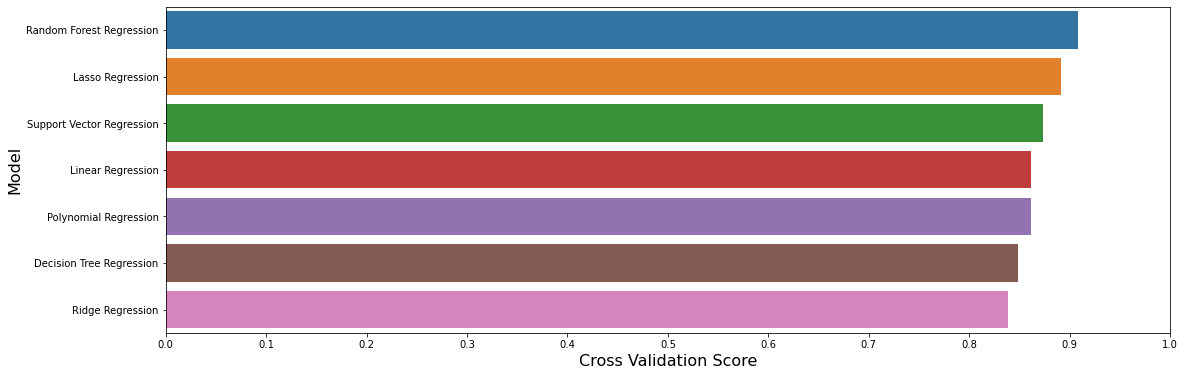

In [52]:
fig, ax = plt.subplots(1, 1, figsize=(18,6))
predict.sort_values(['CV'], ascending=False, inplace=True)
sns.barplot(x='CV', y='Model', data=predict)
ax.set_xlabel('Cross Validation Score', size=16)
ax.set_ylabel('Model', size=16)
ax.set_xlim(0, 1.0)
ax.set_xticks(np.arange(0, 1.1, 0.1))
plt.show()

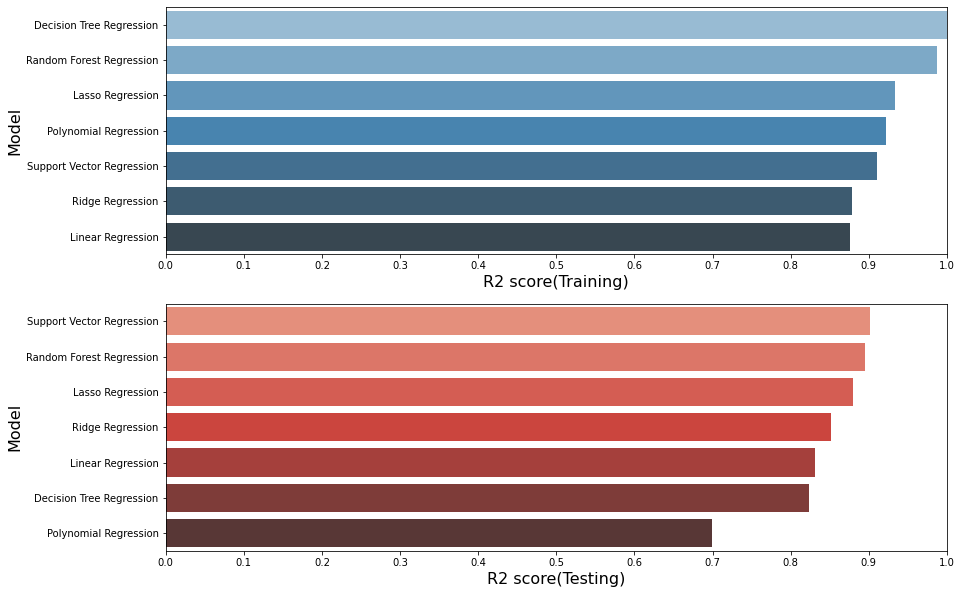

In [70]:
fig, ax = plt.subplots(2, 1, figsize=(14,10))
predict.sort_values(['R2 score(Training)'], ascending=False, inplace=True)
sns.barplot(x='R2 score(Training)', y='Model', data=predict, palette='Blues_d', ax=ax[0])
ax[0].set_xlabel('R2 score(Training)', size=16)
ax[0].set_ylabel('Model', size=16)
ax[0].set_xlim(0, 1.0)
ax[0].set_xticks(np.arange(0, 1.1, 0.1))

predict.sort_values(['R2 score(Testing)'], ascending=False, inplace=True)
sns.barplot(x='R2 score(Testing)', y='Model', data=predict, palette='Reds_d', ax=ax[1])
ax[1].set_xlabel('R2 score(Testing)', size=16)
ax[1].set_ylabel('Model', size=16)
ax[1].set_xlim(0, 1.0)
ax[1].set_xticks(np.arange(0, 1.1, 0.1))
plt.show()

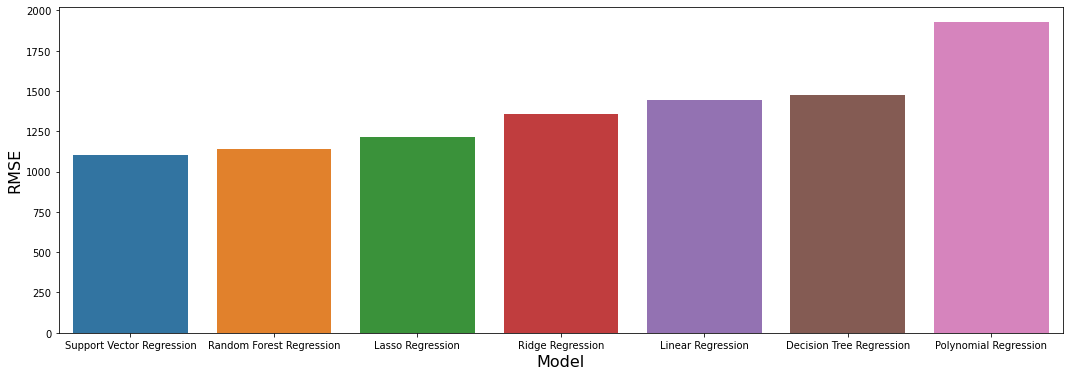

In [87]:
fig, ax = plt.subplots(1, 1, figsize=(18, 6))
predict.sort_values('RMSE', ascending=True, inplace=True)
sns.barplot(x='Model', y='RMSE', data=predict, ax=ax)
ax.set_xlabel('Model', size=16)
ax.set_ylabel('RMSE', size=16)
plt.show()